In [1]:
# Import Dependencies
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Make a reference to the crimes.csv file path
csv_path = "/Users/jstrawin/Desktop/Project3/Resources/Crimes_2019.csv"

# Import the crimes.csv file as a DataFrame
crimes_df = pd.read_csv(csv_path, encoding="utf-8")
crimes_df = crimes_df.dropna()
crimes_df['Date'] = pd.to_datetime(crimes_df['Date']).dt.date
crimes_df['Date'] = pd.to_datetime(crimes_df.Date,format='%Y-%m-%d %H:%M')
crimes_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,11858381,JC469488,2019-10-11,021XX W 72ND PL,0810,THEFT,OVER $500,STREET,False,False,...,-87.676928,"(41.762038621, -87.676927902)",17.0,22257.0,65.0,433.0,31.0,23.0,17.0,7.0
1,11858167,JC469480,2019-10-11,046XX W HARRISON ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,True,False,...,-87.741427,"(41.873224961, -87.741426819)",36.0,22216.0,26.0,69.0,14.0,32.0,16.0,143.0
2,11858286,JC469479,2019-10-11,081XX S COTTAGE GROVE AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,-87.605120,"(41.747170897, -87.605119541)",9.0,21546.0,40.0,247.0,35.0,61.0,20.0,235.0
3,11858203,JC469489,2019-10-11,005XX W 61ST PL,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,True,False,...,-87.638476,"(41.782606021, -87.638476359)",53.0,21559.0,66.0,166.0,4.0,11.0,17.0,135.0
4,11858205,JC469526,2019-10-11,007XX E 103RD ST,1310,CRIMINAL DAMAGE,TO PROPERTY,GAS STATION,False,False,...,-87.605637,"(41.707455731, -87.605637491)",9.0,21861.0,47.0,643.0,35.0,19.0,10.0,250.0


In [3]:
### Check how many arrest are there
crimes_df.Arrest.value_counts()

False    157621
True      42667
Name: Arrest, dtype: int64

In [4]:
total_per = crimes_df.Arrest.mean()
print(total_per)

0.21302823933535708


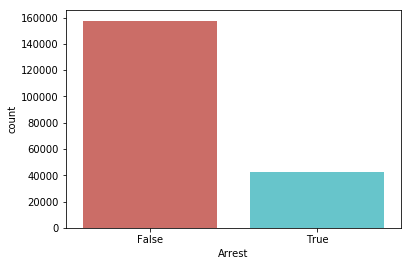

In [5]:
crimes_df.Arrest.value_counts()
sns.countplot(x = 'Arrest', data = crimes_df, palette = 'hls')
plt.show()

In [6]:
# Remove unecessary columns from the DataFrame and save the new DataFrame
# Only keep: "IUCR", "Primary Type", Arrest", "Community Area", "Date"

reduced_df = crimes_df.drop(["ID", "Case Number", "Block", "Description", "X Coordinate", "Y Coordinate", "Year", "Updated On",\
                             "Latitude", "Longitude", "Location","Boundaries - ZIP Codes", "Zip Codes","Historical Wards 2003-2015"\
                            ,"Census Tracts", "Police Districts", "Location Description", "Domestic", "Beat", "District", "FBI Code", "Community Areas", "Wards", "Police Beats"], axis=1)
reduced_df.head()

,Date,IUCR,Primary Type,Arrest,Ward,Community Area
0,2019-10-11,0810,THEFT,False,17.0,67.0
1,2019-10-11,143A,WEAPONS VIOLATION,True,24.0,25.0
2,2019-10-11,0460,BATTERY,False,8.0,44.0
3,2019-10-11,143A,WEAPONS VIOLATION,True,20.0,68.0
4,2019-10-11,1310,CRIMINAL DAMAGE,False,9.0,50.0


In [7]:
mean_IUCR = reduced_df.groupby('Ward').agg(['mean', 'count'])
print(mean_IUCR)

        Arrest        Community Area       
          mean  count           mean  count
Ward                                       
1.0   0.156868   3691      23.106746   3691
2.0   0.147958   4089      12.367327   4089
3.0   0.207097   5664      37.255297   5664
4.0   0.158661   5288      35.616112   5288
5.0   0.152944   4603      43.742559   4603
6.0   0.249374   7583      63.248714   7583
7.0   0.240728   5824      45.396635   5824
8.0   0.235350   6348      46.735192   6348
9.0   0.257797   6156      50.884178   6156
10.0  0.259921   2797      49.795495   2797
11.0  0.170509   2299      49.332753   2299
12.0  0.229249   2530      45.836759   2530
13.0  0.136126   1719      63.149506   1719
14.0  0.181938   2270      59.759031   2270
15.0  0.199267   3001      62.854049   3001
16.0  0.241710   6152      66.147594   6152
17.0  0.260758   6600      66.835909   6600
18.0  0.143378   2741      68.662532   2741
19.0  0.131615   1474      73.474220   1474
20.0  0.212595   6336      52.35

In [8]:
# Push the remade DataFrame to a new CSV file
mean_IUCR.to_csv("Output/Mean Ward.csv",
                  encoding="utf-8", index=True, header=True)